In [1]:
%pylab inline --no-import-all
%load_ext autoreload
from sys import path; path.append('../')
from cycles.cycles import *
import pickle

Populating the interactive namespace from numpy and matplotlib


Load data from Yahoo Finance

In [2]:
update_adj_close(["^IXIC","^DJI"],path="../cycles/data")

loading: ^IXIC
[*********************100%***********************]  1 of 1 completed
loading: ^DJI
[*********************100%***********************]  1 of 1 completed


In [3]:
start_date = "1992-01-02"
p = Portfolio(start_date, 50000)

Buy as many shares of ^IXIC as possible on `start_date`

In [4]:
symbol = "^IXIC"
p.buy(symbol, start_date)

Initialize a test object, which will test from the last activity date of the portfolio (currently `start_date`) through 2021-02-26

In [5]:
end_date = "2021-02-26"
test = Strategies(p, end_date)

Run a cycles test using "absolute" cycles requirement

In [6]:
train_days = 60 # number of days to train on
predict_days = 6 # prediction window
max_rank = 30 # number of cycles to fit to training data
method = "absolute" # absolute cycles requirement
sell_thresh = 4 # required number of cycles with maxes in prediction window to buy
buy_thresh = 4 # required number of cycles with mins in prediction window to sell
min_len_factor = 2 # eligible cycles have period > min_len_factor * predict_days

print("processing:",symbol)
p_new = test.cycles(\
    train_days=train_days,
    predict_days=predict_days,
    max_rank=max_rank,
    method=method,
    min_len_factor=min_len_factor,
    sell_thresh=sell_thresh,
    buy_thresh=buy_thresh
    )
print("close value:",p_new.value())

processing: ^IXIC
(1993-07-27 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(1996-04-26 00:00:00) num_pass: 5, buy: 4, threshold: 4 - buying
(2000-05-03 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(2001-06-07 00:00:00) num_pass: 6, buy: 4, threshold: 4 - buying
(2004-01-16 00:00:00) num_pass: 6, sell: 4, threshold: 4 - selling
(2006-09-18 00:00:00) num_pass: 5, buy: 4, threshold: 4 - buying
(2008-07-21 00:00:00) num_pass: 6, sell: 4, threshold: 4 - selling
(2011-05-03 00:00:00) num_pass: 6, buy: 4, threshold: 4 - buying
(2018-04-11 00:00:00) num_pass: 5, sell: 4, threshold: 4 - selling
(2018-09-05 00:00:00) num_pass: 5, buy: 4, threshold: 4 - buying
close value: 796337.9391479492


In [7]:
p_new.positions

cash  ^IXIC
1992-01-02     151.000000   85.0
1993-08-04   60823.148132    0.0
1996-05-06     321.335144   51.0
2000-05-11  178799.919128    0.0
2001-06-15     298.074402   88.0
2004-01-27  186509.597839    0.0
2006-09-26    1079.710632   82.0
2008-07-29  191288.560242    0.0
2011-05-11     669.536316   67.0
2018-04-19  485619.560242    0.0
2018-09-13    4796.962585   60.0
2021-02-26    4796.962585   60.0

Plot showing price history with buy and sell events

Text(0.5, 1.0, 'cycles: ^IXIC')

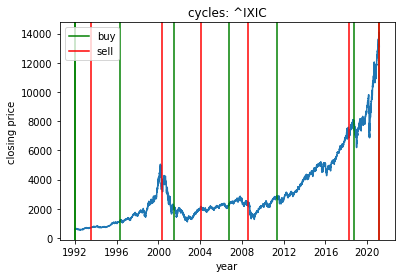

In [8]:
data = read_adj_close([symbol])
data_dates = data.index

s_idx = np.where(data_dates == start_date)[0][0]
e_idx = np.where(data_dates == end_date)[0][0]

plt.plot(data[symbol].index[s_idx:e_idx],data[symbol].values[s_idx:e_idx])
for d in p_new.positions.index[np.where(p_new.positions[symbol].values == 0)]:
    plt.axvline(d, c='r')
for d in p_new.positions.index[np.where(p_new.positions[symbol].values != 0)]:
    plt.axvline(d, c='g')
plt.axvline(pd.to_datetime(start_date), c='g', label='buy')
plt.axvline(pd.to_datetime(end_date), c='r', label='sell')
plt.xlabel('year')
plt.ylabel('closing price')
plt.legend(loc=2)
plt.title(f"cycles: {symbol}")